# Aggregate metrics for Job Characteristics

Some of these indicies combine multiple metrics. All indicies are normalized.

## Method

For 1+ underlying methics in the Occupational Requirements dataset, the raw values will be normalized (z-scores). Those scores will be summed (possiblity weighted) and the sum is normalized to create the final metric.

## Setup

1. Load preprocessed or data
2. Load metadata about estimates

In [1]:
import matplotlib
import pandas

In [2]:
data = pandas.read_csv('ordata-processed.csv', converters={'soc_code': str})
data.head()

,soc_code,00064,00065,00066,00067,00068,00069,00070,00071,00072,...,01076,01077,01080,01081,01084,01085,01087,01088,01090,01091
0,111011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7,56.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,111021,NaN,NaN,NaN,NaN,NaN,6.1,16.7,51.3,20.9,...,11.0,19.1,70.4,29.6,10.7,8.3,NaN,15.7,NaN,18.4
2,112021,NaN,NaN,NaN,NaN,NaN,NaN,14.6,57.6,24.9,...,NaN,21.8,65.3,34.7,NaN,NaN,NaN,NaN,NaN,NaN
3,112022,NaN,NaN,NaN,NaN,NaN,NaN,19.8,56.2,11.6,...,NaN,31.7,83.7,16.3,NaN,32.7,NaN,NaN,NaN,33.4
4,112031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
metadata = pandas.read_csv('ordata/or.estimate', delimiter='\t', index_col=False)
metadata['estimate_code'] = metadata['estimate_code'].map(lambda c: '{:05d}'.format(c))
metadata.head()

,estimate_code,estimate_text,display_level,selectable,sort_sequence
0,00064,"Percent of workers, svp is short demonstration...",0,T,889
1,00065,"Percent of workers, svp is beyond short demons...",0,T,890
2,00066,"Percent of workers, svp is over 1 month, up to...",0,T,891
3,00067,"Percent of workers, svp is over 3 months, up t...",0,T,892
4,00068,"Percent of workers, svp is over 6 months, up t...",0,T,893


## Indicies

Aggregate metrics/indices for:
- Physicality
- Pace of work
- Variety
- Danger
- Communication
 - Type of interaction
- Entry-level/experienced
- Ambiguous decision making

### Physicality Index

Combines underlying metrics:

| Estimate code | Name |
|---------------|------|
|00128|Hours of standing/walking (50th Percentile - median)|
|01006|Percent of day where standing/walking is required (50th Percentile - median)|
|00235|Pounds maximum weight lifted/carried (25th Percentile)|
|00236|Pounds maximum weight lifted/carried (50th Percentile - median)|
|00758|Percent of workers, crawling is required|
|00759|Percent of workers, crouching is required|
|00647|Percent of workers, pushing/pulling with feet only is required, frequently|
|00648|Percent of workers, pushing/pulling with feet only is required, constantly|
|00298|Percent of workers, pushing/pulling with feet/legs is required, frequently|
|00828|Percent of workers, pushing/pulling with feet/legs is required|
|00829|Percent of workers, pushing/pulling with hands/arms is required|
|00364|Percent of workers, climbing ramps or stairs (structure-related) is required|
|00752|Percent of workers, climbing ramps or stairs (work-related) is required|
|00751|Percent of workers, climbing ladders, ropes, or scaffolds is required|
|00398|Percent of workers, stooping is required, frequently|
|00411|Percent of workers, kneeling is required, occasionally|
|00663|Percent of workers, strength is medium work|
|00664|Percent of workers, strength is heavy work|
|00665|Percent of workers, strength is very heavy work|
|00827|Percent of workers, pushing/pulling with feet only is required|

In [4]:
codes = [
'00128',
'01006',
'00235',
'00236',
'00758',
'00759',
'00647',
'00648',
'00298',
'00828',
'00829',
'00364',
'00752',
'00751',
'00398',
'00411',
'00663',
'00664',
'00665',
'00827'
]

In [5]:
data['00235'].hist()

In [6]:
normalized = pandas.DataFrame({
    c: (data[c] - data[c].mean()) / (data[c].std())
    for c in codes if c in data
})
normalized.dropna(axis=0)
normalized.dropna(axis=1)
normalized.head()

,00128,00235,00236,00298,00364,00398,00411,00648,00663,00664,00665,00751,00752,00758,00759,00827,00828,00829,01006
0,NaN,-0.77529,NaN,NaN,0.746637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.703493,NaN,NaN,NaN,NaN,NaN,-1.318406
1,-1.022171,-0.77529,-0.678812,NaN,-0.565729,NaN,NaN,NaN,-0.799107,NaN,NaN,-1.328704,-0.514486,NaN,-1.166201,NaN,-1.548258,-1.558148,-1.165483
2,NaN,NaN,-1.175379,NaN,-0.060973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.699556,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.022171,-0.77529,-1.175379,NaN,-0.013862,NaN,NaN,NaN,-1.446244,NaN,NaN,-1.391797,-0.490861,NaN,-1.396114,NaN,NaN,NaN,-1.165483
4,-1.022171,-0.77529,-0.678812,NaN,-0.188844,NaN,NaN,NaN,-0.741838,NaN,NaN,NaN,-0.006530,NaN,-0.858205,NaN,NaN,NaN,-1.165483


In [7]:
normalized['sum'] = normalized.sum(axis=1)
normalized['index'] = (normalized['sum'] - normalized['sum'].mean()) / normalized['sum'].std()
normalized.head()

,00128,00235,00236,00298,00364,00398,00411,00648,00663,00664,...,00751,00752,00758,00759,00827,00828,00829,01006,sum,index
0,NaN,-0.77529,NaN,NaN,0.746637,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.703493,NaN,NaN,NaN,NaN,NaN,-1.318406,-2.050552,-0.362780
1,-1.022171,-0.77529,-0.678812,NaN,-0.565729,NaN,NaN,NaN,-0.799107,NaN,...,-1.328704,-0.514486,NaN,-1.166201,NaN,-1.548258,-1.558148,-1.165483,-11.122390,-1.967751
2,NaN,NaN,-1.175379,NaN,-0.060973,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.699556,NaN,NaN,NaN,NaN,NaN,NaN,-1.935907,-0.342497
3,-1.022171,-0.77529,-1.175379,NaN,-0.013862,NaN,NaN,NaN,-1.446244,NaN,...,-1.391797,-0.490861,NaN,-1.396114,NaN,NaN,NaN,-1.165483,-8.877201,-1.570537
4,-1.022171,-0.77529,-0.678812,NaN,-0.188844,NaN,NaN,NaN,-0.741838,NaN,...,NaN,-0.006530,NaN,-0.858205,NaN,NaN,NaN,-1.165483,-5.437175,-0.961934


In [8]:
def create_index(df, columns, weights=None):
    if weights is None:
        weights = [1.] * len(columns)
    assert len(weights) == len(columns)
    normalized = {}
    for c, w in zip(columns, weights):
        if c in df:
            normalized[c] = (data[c] - data[c].mean()) / (data[c].std())
            normalized[c] = (normalized[c] - normalized[c].min()) * w
    normalized = pandas.DataFrame(normalized)
    sums = normalized.sum(axis=1)
    return (sums - sums.mean()) / sums.std()

In [9]:
physicality_index = create_index(data, codes)
physicality_index.head()

0   -0.724120
1   -0.400566
2   -0.883368
3   -0.554409
4   -0.358270
dtype: float64

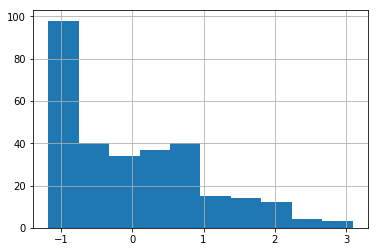

In [10]:
physicality_index.hist()

### Pace of work

| Estimate code | Weight | Name |
|---------------|--------|------|
|01071|2|Percent of workers, pace of work is rapid|
|01072|1|Percent of workers, pace of work is steady|

In [11]:
pace_of_work_index = create_index(data, ['01072', '01071'], [1, 2])
pace_of_work_index.head()

0   -0.114775
1    0.004275
2   -0.080702
3    0.213450
4    0.063105
dtype: float64

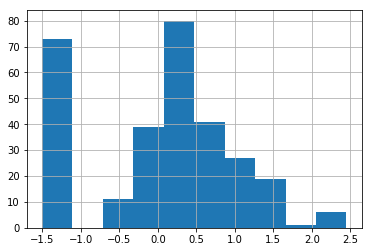

In [12]:
pace_of_work_index.hist()

### Variety

| Estimate code | Name |
|---------------|------|
|01056|Percent of workers, work location changes up to four times per year|
|01057|Percent of workers, work location changes more than four times per year|
|01059|Percent of workers, schedule changes yes|
|01080|Percent of workers, pace of work with faster/slower work periods is yes|

In [13]:
variety_index = create_index(data, ['01056', '01057', '01059', '01080'])
variety_index.head()

0    0.598219
1    1.744551
2    1.345437
3    2.052344
4   -0.895883
dtype: float64

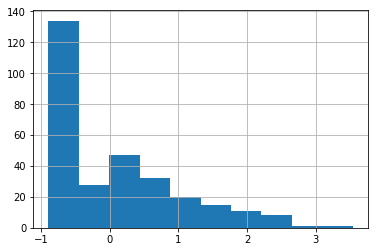

In [14]:
variety_index.hist()

### Danger

| Estimate code | Name |
|---------------|------|
|00427|Percent of workers exposed to extreme cold, constantly|
|00767|Percent of workers exposed to extreme cold|
|00440|Percent of workers exposed to extreme heat, frequently|
|00768|Percent of workers exposed to extreme heat|
|00454|Percent of workers exposed to wetness, frequently|
|00455|Percent of workers exposed to wetness, constantly|
|00845|Percent of workers exposed to wetness|
|00797|Percent of workers exposed to humidity|
|00786|Percent of workers exposed to hazardous contaminants|
|00787|Percent of workers exposed to hazardous contaminants, fully mitigated|
|00791|Percent of workers exposed to heavy vibrations|
|00792|Percent of workers exposed to high, exposed places|
|00793|Percent of workers exposed to high, exposed places, fully mitigated|
|00615|Percent of workers exposed to outdoors, frequently|
|00616|Percent of workers exposed to outdoors, constantly|
|00815|Percent of workers exposed to outdoors|
|00573|Percent of workers exposed to loud noise intensity level|
|00574|Percent of workers exposed to very loud noise intensity level|

In [15]:
danger_index = create_index(data, ['00427',
'00767',
'00440',
'00768',
'00454',
'00455',
'00845',
'00797',
'00786',
'00787',
'00791',
'00792',
'00793',
'00615',
'00616',
'00815',
'00573',
'00574'])
danger_index.head()

0   -0.509746
1   -0.309912
2   -0.558746
3   -0.434556
4   -0.518194
dtype: float64

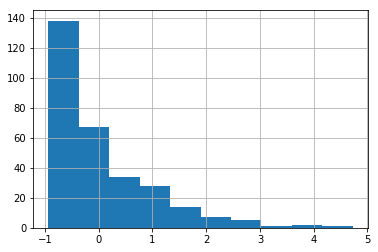

In [16]:
danger_index.hist()

### Communication

| Estimate code | Weight | Name |
|---------------|--------|------|
|01045|3|Percent of workers, frequency of contact with other contacts is continuous|
|01046|2|Percent of workers, frequency of contact with other contacts is more than once per hour|
|01047|1|Percent of workers, frequency of contact with other contacts is more than once per day|
|01050|3|Percent of workers, frequency of contact with regular contacts is continuous|	
|01051|2|Percent of workers, frequency of contact with regular contacts is more than once per hour|
|01052|1|Percent of workers, frequency of contact with regular contacts is more than once per day|
|00561|3|Percent of workers, communicating verbally is required, constantly|
|00560|2|Percent of workers, communicating verbally is required, frequently|
|00559|1|Percent of workers, communicating verbally is required, occasionally|

In [17]:
regular_contact_freq_index = create_index(data, ['01045', '01046', '01047'], [3,2,1])
other_contact_freq_index = create_index(data, ['01050', '01051', '01052'], [3,2,1])
communication_index = create_index(data, ['01045', '01046', '01047', '01050', '01051', '01052', '00561', '00560', '00559'], [3,2,1,3,2,1,3,2,1])
communication_index.head()

0    0.550012
1    0.771077
2   -0.029500
3    1.440692
4    0.626005
dtype: float64

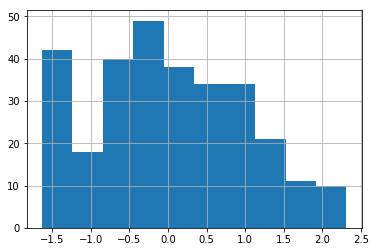

In [18]:
communication_index.hist()

In [19]:
contact_type_ratio = regular_contact_freq_index / (regular_contact_freq_index + other_contact_freq_index)
contact_type_ratio = (contact_type_ratio - contact_type_ratio.min()) / (contact_type_ratio.max() - contact_type_ratio.min())
contact_type_ratio.head()

0    0.140347
1    0.141227
2    0.141511
3    0.142246
4    0.142837
dtype: float64

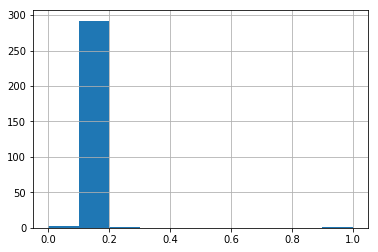

In [20]:
contact_type_ratio.hist()

#### Type of interaction

Regular Contacts:

| Estimate Code | Weight | Name | 
| ------------- | ------ | ---- |
|01030|1|Percent of workers, type of interaction with regular contacts is factual info exchange|
|01031|2|Percent of workers, type of interaction with regular contacts is coordinating
|01032|3|Percent of workers, type of interaction with regular contacts is gentle persuading|
|01033|4|Percent of workers, type of interaction with regular contacts is influencing|
|01034|5|Percent of workers, type of interaction with regular contacts is resolving controversial issues|

Other Contacts:

| Estimate Code | Weight | Name | 
| ------------- | ------ | ---- |
|01036|1|Percent of workers, type of interaction with other contacts is factual info exchange|
|01037|2|Percent of workers, type of interaction with other contacts is coordinating
|01038|3|Percent of workers, type of interaction with other contacts is gentle persuading|
|01039|4|Percent of workers, type of interaction with other contacts is influencing|
|01040|5|Percent of workers, type of interaction with other contacts is resolving controversial issues|

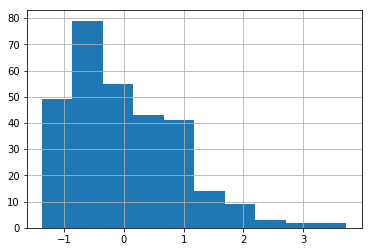

In [21]:
regular_interaction_type_index = create_index(data, ['01030', '01031', '01032', '01033', '01034'], [1,2,3,4,5])
other_interaction_type_index = create_index(data, ['01036', '01037', '01038', '01039', '01040'], [1,2,3,4,5])
interaction_type_index = regular_interaction_type_index * contact_type_ratio + other_interaction_type_index * (1 - contact_type_ratio)
interaction_type_index.hist()

### Entry-level/Experienced

| Estimate code | Name |
|---------------|------|
|00107|Percent of workers, prior work experience is required|
|00111|Days of prior work experience (50th Percentile - median)|
|00098|Percent of workers, pre-employment training is required|
|00104|Days of pre-employment training (50th Percentile - median)|
|00122|Percent of workers, post-employment training is required|
|00119|Days of post-employment training (50th Percentile - median)|

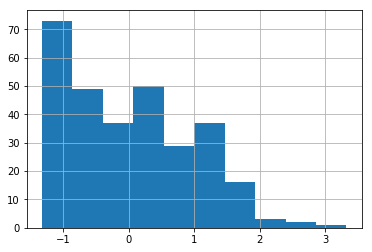

In [24]:
experience_index = create_index(data, ['00107', '00111', '00098', '00104', '00122', '00119'])
experience_index.hist()

### Ambiguous Decision Making

| Estimate code | Weight | Name |
| ------------- | ------ | ---- |
| 01068|1|Percent of workers, type of decision making is no set responses|
|01069|2|Percent of workers, type of decision making is degree of uncertainty or complexity|

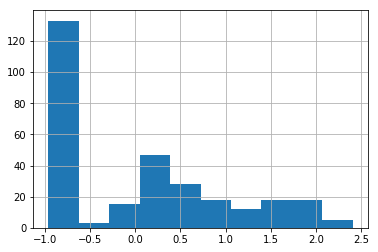

In [25]:
uncertain_decisions_index = create_index(data, ['01068', '01069'], [1, 2])
uncertain_decisions_index.hist()

## Outputting Values


    Physicality
    Pace of work
    Variety
    Danger
    Communication
        Type of interaction
    Entry-level/experienced
    Ambiguous decision making

In [98]:
output = pandas.DataFrame({
    'soc_code': data['soc_code'],
    'physicality': physicality_index,
    'pace_of_work': pace_of_work_index,
    'variety': variety_index,
    'danger': danger_index,
    'communication': communication_index,
    'interaction_complexity': interaction_type_index,
    'experience': experience_index,
    'uncertain_decisions': uncertain_decisions_index
})
output.set_index('soc_code', inplace=True)
output.head()

,communication,danger,experience,interaction_complexity,pace_of_work,physicality,uncertain_decisions,variety
soc_code,,,,,,,,
111011,0.550012,-0.509746,0.501938,1.164292,-0.114775,-0.724120,2.411379,0.598219
111021,0.771077,-0.309912,0.519413,1.883329,0.004275,-0.400566,1.888648,1.744551
112021,-0.029500,-0.558746,0.427417,2.550999,-0.080702,-0.883368,2.108915,1.345437
112022,1.440692,-0.434556,0.484537,3.354653,0.213450,-0.554409,1.848539,2.052344
112031,0.626005,-0.518194,-0.454664,-0.689362,0.063105,-0.358270,-0.964388,-0.895883


In [99]:
len(output)

297

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b86b390>,
      dtype=object)

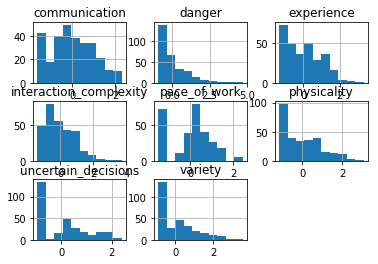

In [100]:
output.hist()

In [101]:
occupations = pandas.read_csv(
    'oedata/oe.occupation', 
    delimiter='\t', 
    index_col=False, 
    usecols=['occupation_code', 'occupation_name'],
    converters={'occupation_code': str}
)
occupations.set_index('occupation_code', inplace=True)
occupations.head()

,occupation_name
occupation_code,
000000,All Occupations
110000,Management Occupations
111000,Top Executives
111011,Chief Executives
111021,General and Operations Managers


In [102]:
output = occupations.join(output, how='inner')
output.index.name = 'soc_code'
output.head()

,occupation_name,communication,danger,experience,interaction_complexity,pace_of_work,physicality,uncertain_decisions,variety
soc_code,,,,,,,,,
111011,Chief Executives,0.550012,-0.509746,0.501938,1.164292,-0.114775,-0.724120,2.411379,0.598219
111021,General and Operations Managers,0.771077,-0.309912,0.519413,1.883329,0.004275,-0.400566,1.888648,1.744551
112021,Marketing Managers,-0.029500,-0.558746,0.427417,2.550999,-0.080702,-0.883368,2.108915,1.345437
112022,Sales Managers,1.440692,-0.434556,0.484537,3.354653,0.213450,-0.554409,1.848539,2.052344
112031,Public Relations and Fundraising Managers,0.626005,-0.518194,-0.454664,-0.689362,0.063105,-0.358270,-0.964388,-0.895883


In [103]:
output.to_csv('calculated_metrics.csv')

In [31]:
output.sort_values(by='experience')['occupation_text']

soc_code
537199                   Material Moving Workers, All Other
493011           Aircraft Mechanics and Service Technicians
434181    Reservation and Transportation Ticket Agents a...
434031                                     Municipal Clerks
132099                     Financial Specialists, All Other
434031                                         Court Clerks
433099                          Financial Clerks, All Other
393031          Ushers, Lobby Attendants, and Ticket Takers
172011                                  Aerospace Engineers
359099    Food Preparation and Serving Related Workers, ...
191042           Medical Scientists, Except Epidemiologists
194021                               Biological Technicians
194031                                 Chemical Technicians
194099                             Quality Control Analysts
339091                                      Crossing Guards
312021                        Physical Therapist Assistants
311015                         

In [32]:
pearson_corr = output.corr('pearson')
pearson_corr

,communication,danger,experience,interaction_complexity,pace_of_work,physicality,uncertain_decisions,variety
communication,1.000000,0.046030,0.341224,0.402669,0.499415,0.100799,0.149817,0.391899
danger,0.046030,1.000000,0.175787,-0.098537,0.370943,0.781918,-0.076717,0.485412
experience,0.341224,0.175787,1.000000,0.423799,0.267269,0.183872,0.402732,0.516721
interaction_complexity,0.402669,-0.098537,0.423799,1.000000,0.137294,-0.076630,0.495338,0.424198
pace_of_work,0.499415,0.370943,0.267269,0.137294,1.000000,0.357689,0.120306,0.463125
physicality,0.100799,0.781918,0.183872,-0.076630,0.357689,1.000000,-0.147505,0.480682
uncertain_decisions,0.149817,-0.076717,0.402732,0.495338,0.120306,-0.147505,1.000000,0.220416
variety,0.391899,0.485412,0.516721,0.424198,0.463125,0.480682,0.220416,1.000000


In [33]:
spearman_corr = output.corr('spearman')
spearman_corr

,communication,danger,experience,interaction_complexity,pace_of_work,physicality,uncertain_decisions,variety
communication,1.000000,0.100337,0.355521,0.456593,0.401312,0.155703,0.207119,0.430231
danger,0.100337,1.000000,0.150799,-0.066458,0.357612,0.850742,-0.088540,0.487860
experience,0.355521,0.150799,1.000000,0.437016,0.195452,0.167946,0.437636,0.505926
interaction_complexity,0.456593,-0.066458,0.437016,1.000000,0.104997,-0.013353,0.453551,0.429320
pace_of_work,0.401312,0.357612,0.195452,0.104997,1.000000,0.357086,0.064687,0.419319
physicality,0.155703,0.850742,0.167946,-0.013353,0.357086,1.000000,-0.128019,0.493951
uncertain_decisions,0.207119,-0.088540,0.437636,0.453551,0.064687,-0.128019,1.000000,0.237626
variety,0.430231,0.487860,0.505926,0.429320,0.419319,0.493951,0.237626,1.000000
